In [1]:
#from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras
from keras import datasets

import numpy as np
print(tf.__version__)

Using TensorFlow backend.


2.1.0


In [2]:
imdb = datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 1s 0us/step


In [3]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

Training entries: 25000, labels: 25000


In [4]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [5]:
len(train_data[0]), len(train_data[1])

(218, 189)

In [6]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       padding='post',
                                                       maxlen=256)

In [7]:
len(train_data[0]), len(train_data[1])

(256, 256)

In [8]:
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

In [9]:
import keras
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling2D, Dropout, Activation, Flatten, Embedding, GlobalAveragePooling1D
from keras.utils.np_utils import to_categorical
from keras.optimizers import SGD
from keras.layers.normalization import BatchNormalization
from sklearn.model_selection import train_test_split
from keras.models import load_model

vocab_size = 10000

model = keras.Sequential()
model.add(Embedding(vocab_size, 16))
model.add(GlobalAveragePooling1D())
model.add(Dense(16, activation=tf.nn.relu))
model.add(Dense(1, activation=tf.nn.sigmoid))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [11]:
history = model.fit(train_data, train_labels, epochs=40, batch_size=512, validation_split=0.4, verbose=1)

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 89us/step - loss: 0.6920 - acc: 0.5135 - val_loss: 0.6904 - val_acc: 0.5684
Epoch 2/40
15000/15000 [==============================] - 0s 22us/step - loss: 0.6862 - acc: 0.6527 - val_loss: 0.6811 - val_acc: 0.7107
Epoch 3/40
15000/15000 [==============================] - 0s 23us/step - loss: 0.6733 - acc: 0.7311 - val_loss: 0.6646 - val_acc: 0.7400
Epoch 4/40
15000/15000 [==============================] - 0s 23us/step - loss: 0.6510 - acc: 0.7554 - val_loss: 0.6386 - val_acc: 0.7633
Epoch 5/40
15000/15000 [==============================] - 0s 21us/step - loss: 0.6182 - acc: 0.7857 - val_loss: 0.6038 - val_acc: 0.7605
Epoch 6/40
15000/15000 [==============================] - 0s 21us/step - loss: 0.5760 - acc: 0.8077 - val_loss: 0.5618 - val_acc: 0.7904
Epoch 7/40
15000/15000 [==============================] - 0s 21us/step - loss: 0.5283 - acc: 0.8353 - val_loss: 0.5171 - val_acc

In [12]:
results = model.evaluate(test_data, test_labels)

print(results)

25000/25000 [==============================] - 1s 28us/step
[0.3334373754310608, 0.8715599775314331]


In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

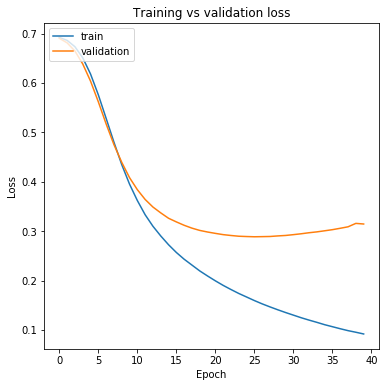

In [14]:
import matplotlib.pyplot as plt


def plotLosses(history): 
    plt.figure(figsize = (6,6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.title('Training vs validation loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
plotLosses(history)


In [19]:
vocab_size = 10000

model = keras.Sequential()
model.add(Embedding(vocab_size, 16))
model.add(GlobalAveragePooling1D())
#model.add(Conv1D(32,3, activation=tf.nn.relu))
model.add(Dense(32, activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dense(16, activation=tf.nn.relu))
model.add(Dense(1, activation=tf.nn.sigmoid))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_3 ( (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                544       
_________________________________________________________________
batch_normalization_2 (Batch (None, 32)                128       
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 161,217
Trainable params: 161,153
Non-trainable params: 64
_______________________________________________

In [21]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['acc'])

In [22]:
history = model.fit(train_data, train_labels, 
                    epochs=40, batch_size=512, validation_split=0.4, verbose=1)

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 2s 115us/step - loss: 0.2372 - acc: 0.6408 - val_loss: 0.2479 - val_acc: 0.7058
Epoch 2/40
15000/15000 [==============================] - 0s 26us/step - loss: 0.1688 - acc: 0.8185 - val_loss: 0.2390 - val_acc: 0.6782
Epoch 3/40
15000/15000 [==============================] - 0s 25us/step - loss: 0.0963 - acc: 0.8888 - val_loss: 0.2242 - val_acc: 0.6692
Epoch 4/40
15000/15000 [==============================] - 0s 27us/step - loss: 0.0647 - acc: 0.9201 - val_loss: 0.2111 - val_acc: 0.7312
Epoch 5/40
15000/15000 [==============================] - 0s 26us/step - loss: 0.0472 - acc: 0.9471 - val_loss: 0.1974 - val_acc: 0.8053
Epoch 6/40
15000/15000 [==============================] - 0s 25us/step - loss: 0.0350 - acc: 0.9636 - val_loss: 0.1835 - val_acc: 0.8483
Epoch 7/40
15000/15000 [==============================] - 0s 28us/step - loss: 0.0271 - acc: 0.9736 - val_loss: 0.1667 - val_ac

In [23]:
results = model.evaluate(test_data, test_labels)

print(results)

25000/25000 [==============================] - 1s 29us/step
[0.13285938495462063, 0.8482400178909302]


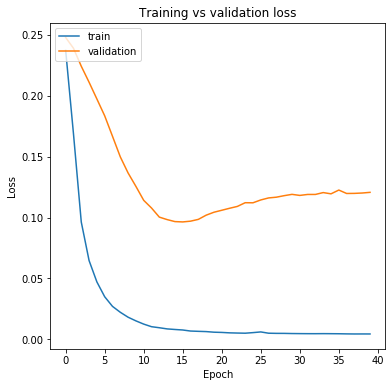

In [24]:
import matplotlib.pyplot as plt


def plotLosses(history): 
    plt.figure(figsize = (6,6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.title('Training vs validation loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
plotLosses(history)
